In [4]:
# check 50 raw code
!sed -n '1,50p' src/pcba_project/random_walk.py


sed: can't read src/pcba_project/random_walk.py: No such file or directory


In [1]:
from pcba_project.random_walk import generate_random_chain
chain = generate_random_chain(10, b=1.0, seed=0)
print(chain.end_to_end_distance(), chain.radius_of_gyration())


5.613728705563616 1.847236416423418


In [3]:
from pcba_project.random_walk import generate_random_chain
from pcba_project.monte_carlo import GaussianMetropolisMCChain

# 1) Generate an initial chain
chain0 = generate_random_chain(N=30, b=1.0, seed=42)
print("Initial end-to-end distance:", chain0.end_to_end_distance())

# 2) Instantiate the MC sampler
mc = GaussianMetropolisMCChain(
    sigma_prop=0.2,   # proposal step‐size
    eps=1.0,          # LJ ε
    sigma_lj=1.0,     # LJ σ
    kT=1.0            # temperature
)

# 3) Run n_steps of sampling
traj, energies = mc.sample(chain0, n_steps=200)

print(f"Sampling done: {len(traj)} states")
print("Energy: ", energies[0], "→", energies[-1])


Initial end-to-end distance: 2.650122508486469
Sampling done: 201 states
Energy:  12612552.289217215 → 447.04943765778165


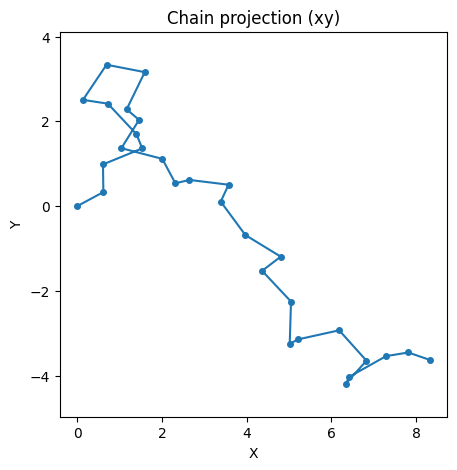

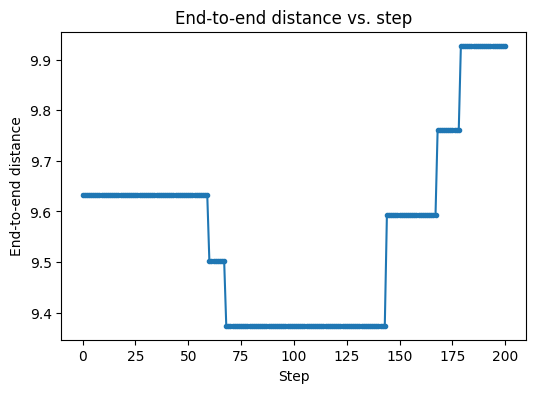

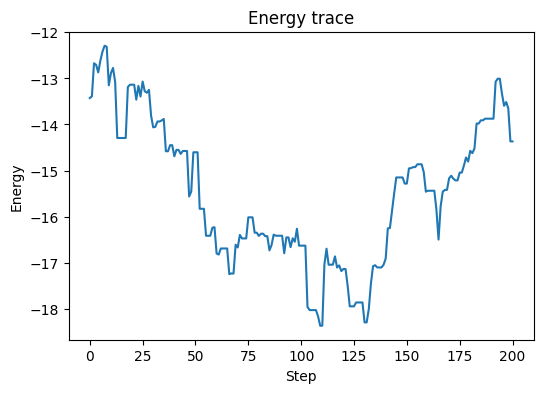

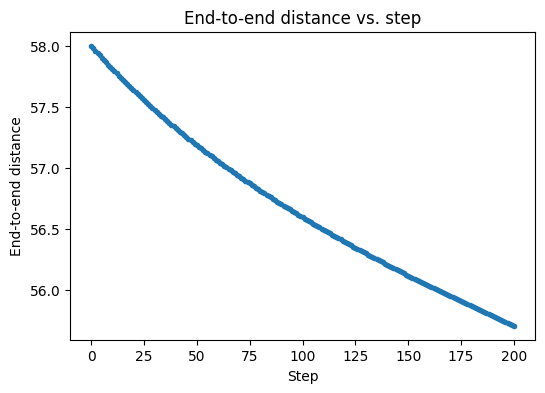

<Axes: title={'center': 'End-to-end distance vs. step'}, xlabel='Step', ylabel='End-to-end distance'>

In [1]:
from pcba_project.random_walk import generate_self_avoiding_chain
from pcba_project.monte_carlo import GaussianMetropolisMCChain
from pcba_project.dynamics import overdamped_integrate
from pcba_project.utils_plot import (
    plot_chain_2d, plot_end_to_end_distance, plot_energy_trace
)

# initial SA chain
chain = generate_self_avoiding_chain(N=30, b=1.0, seed=10)
plot_chain_2d(chain)

# MC sampling
mc = GaussianMetropolisMCChain(sigma_prop=0.3, eps=1.0, sigma_lj=1.0, kT=1.0, r_cut=2.5)
traj_mc, energies = mc.sample(chain, n_steps=200)
plot_end_to_end_distance(traj_mc)
plot_energy_trace(energies)

# Dynamics relaxation from a stretched chain
# stretch by factor 2 along x
import numpy as np
pos = np.zeros((30,3))
for i in range(30):
    pos[i,0] = 2.0 * i
from pcba_project.model import PolymerChain
stretched = PolymerChain(pos, b=1.0)
traj_dyn = overdamped_integrate(
    stretched, dt=0.01, n_steps=200, k_spring=1.0, b_eq=1.0,
    use_lj=False
)
plot_end_to_end_distance(traj_dyn)
